In [36]:
import sys
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

In [37]:
# 드라이버 옵션 설정
chrom_options = webdriver.ChromeOptions()
chrom_options.add_experimental_option('detach', True)
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrom_options)

In [38]:
# 브라우저 띄우기
driver.get('https://www.instagram.com/')
driver.implicitly_wait(2)

In [39]:
# 로그인 설정
login_id = 'sumaoo20@naver.com'
login_pw = 'leejong1829!143'

In [40]:
# 로그인
# driver.find_element(By.XPATH, '//*[@id="loginForm"]/div/div[1]/div/label/input').send_keys(login_id)
# driver.find_element(By.XPATH, '//*[@id="loginForm"]/div/div[2]/div/label/input').send_keys(login_pw)
# time.sleep(2)

## 로그인 다른 방법
driver.find_elements(By.CSS_SELECTOR, "._aa4b._add6._ac4d")[0].send_keys(login_id)
driver.find_elements(By.CSS_SELECTOR, "._aa4b._add6._ac4d")[1].send_keys(login_pw)


In [41]:
# driver.find_element(By.XPATH, '//*[@id="loginForm"]/div/div[3]').click()
driver.find_element(By.CSS_SELECTOR, '._acan._acap._acas._aj1-').click()

driver.implicitly_wait(3)
time.sleep(3)

In [42]:
# 검색 설정 및 검색
keyword = '데일리룩'
driver.get(f'https://www.instagram.com/explore/tags/{keyword}/')
driver.implicitly_wait(5)
time.sleep(5)

In [59]:
a = driver.find_elements(By.CSS_SELECTOR, 'div._aagw')
a[0].click()
time.sleep(2)
# 포스트 정보 가져오기

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
time.sleep(2)
print('포스트 정보 가져오기 완료')

# id 정보 얻기
id = soup.select('div')[1]['id']
print(id)

# xpath 변환 함수 설정
def XPATH_id_changer(id, s):
    # s 는 바꿀 주소, id 는 id 정보
    locate = s.find('id=') + 4
    return s[:locate] + id + s[locate + len(id):]

# 댓글 수집 함수
def comment_scraping():
    # 댓글 요소 검색
    ul_list = soup.find_all('ul', class_='_a9ym')

    comments_list = []
    for i in ul_list:
        temp = i.find('div', class_='_a9zs')
        text = temp.find('span')
        try:
            text.find('a').decompose()
        except:
            pass
        comments_list.append(text.get_text().strip(' '))
    return comments_list

import re
hashtag_regex = "#([0-9a-zA-Z가-힣]*)"

# 해시태그 수집 함수 설정
def hashtag_scraping():
    ul_list = soup.find_all('div', class_='_a9zr')
    
    hashtag_list = []
    for i in ul_list:
        hashtags = i.find('div', class_='_a9zs')
        if hashtags:
            a_atags = hashtags.find_all('a', class_='x1i10hfl')
            for a_tag in a_atags:
                hashtag_text = a_tag.get_text()
                match = re.match(hashtag_regex, hashtag_text)
                if match:
                    extracted_hashtag = match.group(1)
                    if any(char.isalpha() for char in extracted_hashtag):
                        hashtag_list.append(extracted_hashtag)
    return hashtag_list

all_hashtags = []
all_comments = []

post_count = 2
for i in range(post_count - 1):
    try:
        if i == 0:
            driver.find_element(By.XPATH, XPATH_id_changer(id, '//*[@id="mount_0_0_om"]/div/div/div[3]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button')).click()
        else:
            driver.find_element(By.XPATH, XPATH_id_changer(id, '//*[@id="mount_0_0_om"]/div/div/div[3]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button')).click()
    except:
        break
    time.sleep(1)
    # 현재 페이지 정보 수집
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # 해쉬태그 스크래핑
    hashtags = hashtag_scraping()
    all_hashtags.extend(hashtags)
    comments = comment_scraping()
    all_comments.extend(comments)

print('Total hashtag count:', len(all_hashtags))
print("All hashtags:", all_hashtags)
print("comments:", all_comments)


포스트 정보 가져오기 완료
mount_0_0_Ln
Total hashtag count: 0
All hashtags: []
comments: ['저두 항상 멘트가 고민..😵\u200d💫', '_', '미모 때문에 사실 글이 안보여요', '앜ㅋㅋㅋㅋㅋ네,, 저도 좀 고민을 하긴 헤요,,ㅎㅎ 요거 블라우스 나랑 커플💗💗', '아낰ㅋㅋㅋㅋ넘 귀여우셬ㅋㅋㅋㅋ 사진만 올려주셔듀 됩니댜..💕💕', '룩너무 찰떡이에요 잘어울려요🔥🔥🔥', '글 안써도 괜찮아요~ 미모로 충분해요❤️', '귀여유..🤍', '진짜 내이야기 같아서 웃었어요.......😢 나도사랑해요진차❤️', '무채색룩에 은색? 가방 포인트 좋아요🙌🙌', '그냥 사진 자주 올려주세여,, 🫶\U0001fa77', '앜ㅋㅋㅋㅋㅋㅋ푸름님 공감돼욬ㅋㅋㅋㅋㅋ마치 네번째 사진의 표정이 그 마음을 대변하는 것 같은..저두 감자해요🤍🤍🤍요 날두 코디 넘 제 취향..› ̫‹', '요 장소 진짜 찰떡..평소 무드랑도 너무 잘 어울리시는 곳인데요?!?🤓', '멘트 고민 삼천번씩 하는거 국룰 🫠🤍', '사진만 올려두되요,,,, 그저 너무 예뿜 ㅠㅠ🥹💛']


In [12]:
import csv

csv_file_name = f"{keyword}.csv"

with open(csv_file_name, 'w', newline='', encoding='utf-8-sig') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # 헤더 작성
    csvwriter.writerow(['hashtag'])
    
    for hashtag in all_hashtags:
        csvwriter.writerow([hashtag])
        
print(f"Total {len(all_hashtags)} hashtags have been written to {csv_file_name}")

Total 1043 hashtags have been written to 스키니핏.csv


In [13]:
import pandas as pd

# 합칠 CSV 파일들의 리스트 생성
csv_files = ["레귤러핏.csv", "세미오버핏.csv", "슬림핏.csv", "오버핏.csv", "와이드핏.csv", "테이퍼드핏.csv",]

# CSV 파일들을 DataFrame으로 읽기
dataframes = [pd.read_csv(csv_file) for csv_file in csv_files]

# DataFrame들을 하나로 합치기
merged_dataframe = pd.concat(dataframes, ignore_index=True)

# 새로운 CSV 파일로 저장
merged_csv_filename = "merged.csv"
merged_dataframe.to_csv(merged_csv_filename, index=False, encoding='utf-8-sig')

print(f"Merged CSV file has been created: {merged_csv_filename}")

Merged CSV file has been created: merged.csv


In [16]:
# 폰트 경로 확인
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

[]

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd


# CSV 파일 읽기
csv_filename = "merged.csv"
data = pd.read_csv(csv_filename)

# mask
mask_path = "heart.png"
mask = np.array(Image.open(mask_path))

# 모든 텍스트 합치기
all_text = ' '.join(data['hashtag'])



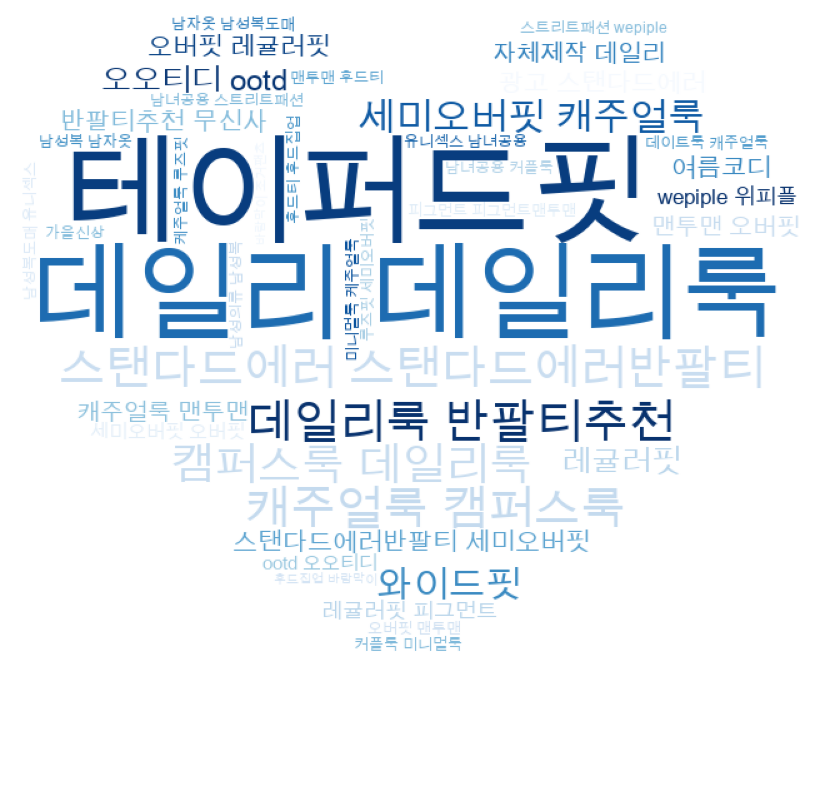

In [15]:

font_path = "/Library/Fonts/Arial Unicode.ttf"

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      font_path=font_path,
                      colormap='Blues',
                      mask= mask,
                      min_font_size=10).generate(all_text)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# 워드 클라우드 저장 (선택사항)
output_filename = "wordcloud.png"
plt.savefig(output_filename)

plt.show()

In [16]:
# tf 값 구현
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# CSV 파일 읽기
csv_filename = "merged.csv"
data = pd.read_csv(csv_filename)

# 모든 해시태그 텍스트 합치기
csv_filename = "merged.csv"
data = pd.read_csv(csv_filename)

# 모든 해시태그 텍스트 합치기
all_hashtags = data['hashtag'].str.replace('#', '').str.lower().str.replace(r'[^\w\s]', '').str.split()
# print(all_hashtags)

# 해시태그 리스트를 공백으로 연결하여 문서 형태로 변환
documents = [" ".join(hashtags) for hashtags in all_hashtags]

# TF 변환
tf_vectorizer = CountVectorizer()
tf_matrix = tf_vectorizer.fit_transform(documents)

# TF 결과를 데이터프레임으로 변환
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=tf_vectorizer.get_feature_names_out())

# 각 해시태그의 총 횟수 계산
hashtag_counts = tf_df.sum()

# TF 값이 높은 순서로 정렬
sorted_hashtag_counts = hashtag_counts.sort_values(ascending=False)

# 정렬된 컬럼으로 데이터프레임 재구성
sorted_tf_df = tf_df[sorted_hashtag_counts.index]

print(sorted_hashtag_counts)

# 결과를 엑셀 파일로 저장
output_excel_filename = "sorted_tf_counts_results.xlsx"
sorted_tf_df.to_excel(output_excel_filename, index=False)


ModuleNotFoundError: No module named 'sklearn'

In [51]:
# idf 값 구현
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# CSV 파일 읽기
csv_filename = "merged.csv"
data = pd.read_csv(csv_filename)

# 모든 해시태그 텍스트 합치기
all_hashtags = data['hashtag'].str.replace('#', '').str.lower().str.replace(r'[^\w\s]', '').str.split()

# 해시태그 리스트를 공백으로 연결하여 문서 형태로 변환
documents = [" ".join(hashtags) for hashtags in all_hashtags]

# TF-IDF 변환
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# TF-IDF 결과를 데이터프레임으로 변환
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# IDF 값 추출
idf_values = tfidf_vectorizer.idf_

# 각 단어별 IDF 값 확인
idf_df = pd.DataFrame({"Word": tfidf_vectorizer.get_feature_names_out(), "IDF": idf_values})
print(idf_df)


         Word       IDF
0       10대코디  6.779199
1       20대코디  6.779199
2       541팬츠  6.779199
3       9부슬랙스  6.779199
4    adidasy3  6.779199
..        ...       ...
482        후디  6.779199
483        훈남  6.779199
484      히든밴딩  6.779199
485        힐링  6.373734
486       힙운동  6.779199

[487 rows x 2 columns]


In [3]:
import pandas as pd
merged_df = pd.read_csv('merged.csv',encoding='utf-8') # label은 영화에 대한 긍정평가는 1, 부정평가는 0
merged_df.head()

merged_df['clean_hashtag'] = merged_df['hashtag'].str.replace("[^ㄱ-ㅣ가-힣a-zA-Z]", " ")
merged_df.head(10)



,hashtag,clean_hashtag
0,제작,제작
1,레귤러핏,레귤러핏
2,일자데님,일자데님
3,일자팬츠,일자팬츠
4,밴딩바지,밴딩바지
5,밴딩팬츠,밴딩팬츠
6,포항,포항
7,대구,대구
8,포항옷가게,포항옷가게
9,대구옷가게,대구옷가게


In [4]:
merged_df.isnull().sum()

hashtag          0
clean_hashtag    0
dtype: int64

In [5]:
print(merged_df)



     hashtag clean_hashtag
0         제작            제작
1       레귤러핏          레귤러핏
2       일자데님          일자데님
3       일자팬츠          일자팬츠
4       밴딩바지          밴딩바지
...      ...           ...
7105    반팔니트          반팔니트
7106    여름니트          여름니트
7107    카라니트          카라니트
7108     티셔츠           티셔츠
7109  스타일메이트        스타일메이트

[7110 rows x 2 columns]


In [6]:
merged_df.reset_index(inplace=True)
merged_df.head()

,index,hashtag,clean_hashtag
0,0,제작,제작
1,1,레귤러핏,레귤러핏
2,2,일자데님,일자데님
3,3,일자팬츠,일자팬츠
4,4,밴딩바지,밴딩바지


In [7]:
k_stopword = pd.read_csv('./korean_stopword.csv')
k_stopword

,불용어
0,이
1,있
2,하
3,것
4,들
...,...
134,루
135,요
136,로
137,와


In [8]:
stopwords = list(k_stopword['불용어'])
stopwords = stopwords + ['아니','난','집에','가고']
stopwords[-10:]

['리가', '루', '요', '로', '와', '리', '아니', '난', '집에', '가고']

In [9]:
from konlpy.tag import Okt
okt = Okt()
morphs_lst = []
for i in merged_df.index:
    morphs = []
    morph = okt.morphs(merged_df.loc[i]['clean_hashtag'])
    for txt in morph:
        if txt not in stopwords and len(txt) > 1:
            morphs.append(txt)
    morphs_lst.append(morphs)
merged_df['morphs'] = morphs_lst
merged_df.head()

,index,hashtag,clean_hashtag,morphs
0,0,제작,제작,[제작]
1,1,레귤러핏,레귤러핏,[레귤러핏]
2,2,일자데님,일자데님,"[일자, 데님]"
3,3,일자팬츠,일자팬츠,"[일자, 팬츠]"
4,4,밴딩바지,밴딩바지,[밴딩바]


In [14]:
tokenized_doc = merged_df['morphs']
tokenized_doc

0             [제작]
1           [레귤러핏]
2         [일자, 데님]
3         [일자, 팬츠]
4            [밴딩바]
           ...    
7105          [니트]
7106      [여름, 니트]
7107      [카라, 니트]
7108         [티셔츠]
7109    [스타일, 메이트]
Name: morphs, Length: 7110, dtype: object

In [23]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)

# 샘플 출력
print(tokenized_doc[0])
dictionary.doc2bow(tokenized_doc[0])   # (word_id, word_frequency)

['제작']


[(0, 1)]

In [29]:
corpus = []
for text in tokenized_doc:
    corpus.append(dictionary.doc2bow(text))
corpus 


[[(0, 1)],
 [(1, 1)],
 [(2, 1), (3, 1)],
 [(3, 1), (4, 1)],
 [(5, 1)],
 [(4, 1), (6, 1)],
 [(7, 1)],
 [(8, 1)],
 [(7, 1), (9, 1)],
 [(8, 1), (9, 1)],
 [(10, 1), (11, 1)],
 [(12, 1), (13, 1)],
 [(2, 1), (12, 1)],
 [(14, 1), (15, 1)],
 [(9, 1), (12, 1)],
 [(5, 1)],
 [(16, 1), (17, 1)],
 [(18, 1)],
 [(2, 1)],
 [(2, 1), (4, 1)],
 [(19, 1)],
 [(13, 1)],
 [(9, 1), (12, 1)],
 [(20, 1)],
 [(21, 1)],
 [(12, 1), (22, 1)],
 [(6, 1), (23, 1)],
 [(12, 1), (24, 1)],
 [(25, 1)],
 [(26, 1)],
 [(4, 1), (12, 1), (27, 1)],
 [(4, 1), (27, 1)],
 [(1, 1)],
 [(2, 1), (18, 1)],
 [(28, 1)],
 [(29, 1), (30, 1)],
 [(31, 1)],
 [(9, 1), (31, 1)],
 [(12, 1), (32, 1), (33, 1)],
 [(33, 1), (34, 1)],
 [(33, 1), (35, 1)],
 [(33, 1), (36, 1)],
 [(12, 1), (32, 1), (37, 1)],
 [(1, 1)],
 [(38, 1)],
 [(39, 1)],
 [(40, 1)],
 [(41, 1)],
 [(42, 1)],
 [(43, 1)],
 [(20, 1)],
 [(20, 1)],
 [(26, 1)],
 [(44, 1)],
 [(45, 1)],
 [(46, 1)],
 [(47, 1)],
 [(48, 1)],
 [(49, 1)],
 [(50, 1)],
 [(51, 1)],
 [(52, 1), (53, 1)],
 [(9, 1), (54, 

In [30]:
import gensim
NUM_TOPICS = 20 #20개의 토픽, k=20   # 하단의 그림에 동그라미 20개가 생성됨
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.676*"일리" + 0.037*"셋업" + 0.036*"집업" + 0.032*"후드"')
(1, '0.401*"코디" + 0.216*"바지" + 0.160*"도매" + 0.058*"미니"')
(2, '0.112*"nuzzon" + 0.072*"등산" + 0.048*"포켓" + 0.045*"가능"')
(3, '0.482*"패션" + 0.081*"레귤러핏" + 0.046*"dailylook" + 0.039*"바람막이"')
(4, '0.189*"신상" + 0.136*"빈티" + 0.136*"남녀" + 0.136*"공용"')
(5, '0.161*"니트" + 0.099*"리코" + 0.099*"데일" + 0.086*"커플"')
(6, '0.189*"여성" + 0.184*"투맨" + 0.080*"피플" + 0.055*"반바지"')
(7, '0.198*"옷가게" + 0.106*"충주" + 0.080*"유니섹스" + 0.079*"데이트"')
(8, '0.175*"오오" + 0.175*"티디" + 0.160*"동대문" + 0.106*"후드"')
(9, '0.197*"그램" + 0.157*"스타" + 0.089*"일상" + 0.075*"가디건"')
(10, '0.388*"팬츠" + 0.243*"와이드" + 0.105*"데님" + 0.045*"바지"')
(11, '0.349*"남자" + 0.165*"테이" + 0.160*"퍼드" + 0.100*"바지"')
(12, '0.329*"티셔츠" + 0.253*"추천" + 0.082*"커플룩" + 0.063*"슬랙스"')
(13, '0.227*"얼룩" + 0.190*"캐주" + 0.099*"캠퍼스" + 0.051*"피그먼트"')
(14, '0.174*"ootd" + 0.155*"스탠다드" + 0.153*"에러" + 0.126*"쇼핑몰"')
(15, '0.119*"정장" + 0.111*"주얼" + 0.078*"트레이닝" + 0.072*"기본"')
(16, '0.262*"의류" + 0.199*"셔츠" + 0.153*"남성" + 0

In [32]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary,sort_topics=False)
pyLDAvis.save_html(vis, 'lda.html')

In [33]:
pyLDAvis.display(vis)